In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 分类树

In [19]:
dataset = load_wine()
feature_name = dataset.feature_names
labels = dataset.target_names
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3)

In [33]:
tree = DecisionTreeClassifier(criterion="entropy", random_state=4).fit(X_train, y_train)
tree.score(X_test, y_test)

0.8703703703703703

In [34]:
import graphviz

dot_data = export_graphviz(tree, feature_names=feature_name, class_names=labels, filled=True, rounded=True)

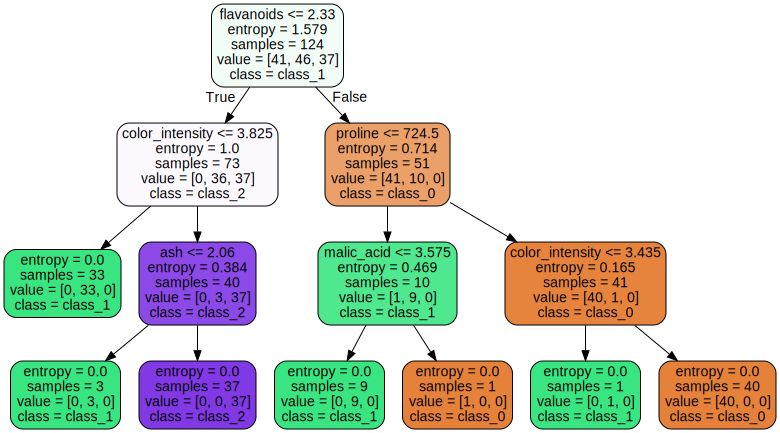

In [35]:
graphy = graphviz.Source(dot_data)
graphy

In [24]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.52759106, 0.        , 0.03436536, 0.09549187,
       0.        , 0.        , 0.34255171])

# 回归树

In [29]:
#二维散点图

X = np.arange(1, 10, 0.2)
y = np.sin(X)
y[::5] += 2 * (0.5 - np.random.rand(y[::5].shape[0])) 


/home/lewin/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


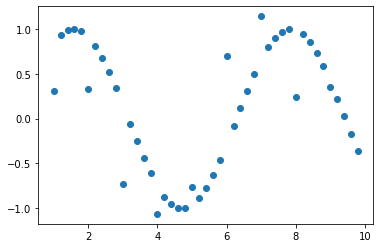

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y)
fig.show()

In [34]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [41]:
reg1 = DecisionTreeRegressor(max_depth=3)
reg2 = DecisionTreeRegressor(max_depth=6)
reg1.fit(X, y)
reg2.fit(X, y)

DecisionTreeRegressor(max_depth=6)

In [44]:
X_test = np.arange(1, 10, 0.3).reshape(-1, 1)
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)

/home/lewin/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


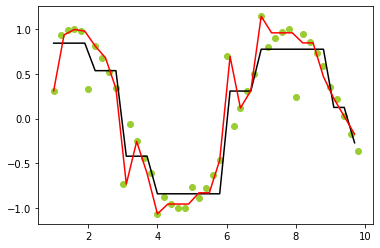

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, y, color="yellowgreen")
ax.plot(X_test, y_pred1, color="black")
ax.plot(X_test, y_pred2, color="red")
fig.show()

In [ ]:
#max_depth限制树的深度可以抑制过拟合
